In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

import random

In [2]:
data=pd.read_excel("filtered dataset.xlsx")
udata=DataFrame()
xdata=DataFrame()

In [3]:
data.head(10)

,Pulse_Rate,Flow_Rate,Quantity,class
0,998,24.950,14.930,0
1,673,16.825,9.151,0
2,1147,30.000,14.904,0
3,312,7.800,3.355,0
4,505,12.625,5.038,0
5,695,17.375,6.149,0
6,897,22.425,7.088,0
7,154,3.850,1.136,0
8,1046,26.150,5.895,0
9,391,9.775,1.740,0


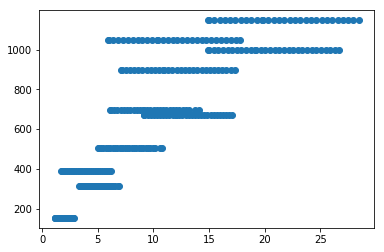

In [4]:
plt.scatter('Quantity','Pulse_Rate',data=data)

In [5]:
X=data['Pulse_Rate']
X = np.array( [ [value] for value in X ] )
Y=data['Quantity']
model=LinearRegression().fit(X,Y)

In [6]:
rv=[]
for _ in range(673):
    rv.append(random.randint(150,1500))
udata['Pulse_Rate']=rv
rv = np.array( [ [value] for value in rv ] )
pred=model.predict(rv)

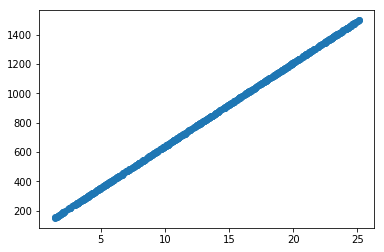

In [8]:
plt.scatter(pred,rv)

In [9]:
upred=[p+random.uniform(-r//200,r//200+1) for r,p in zip(rv,pred)]
upred=[round(float(x),3) for x in upred]
udata['Quantity']=upred

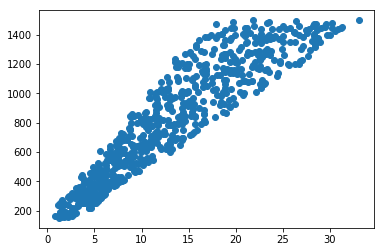

In [10]:
plt.scatter(upred,rv)

In [12]:
udata.head()

,Pulse_Rate,Quantity
0,1470,28.362
1,1252,15.450
2,1194,16.597
3,968,15.508
4,299,4.017


In [ ]:
udata.to_csv("random dataset.csv")

In [13]:
xrv=[]
for _ in range(327):
    xrv.append(random.randint(150,1500))
xdata['Pulse_Rate']=xrv
xrv = np.array( [ [value] for value in xrv ] )
xpred=model.predict(xrv)

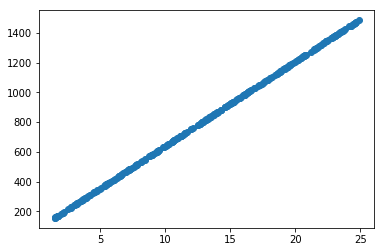

In [14]:
plt.scatter(xpred,xrv)

In [35]:
uxpred=[p+random.uniform(-r//70,-r//270) for r,p in zip(xrv,xpred)]
uxpred=[x if x>0 else 0 for x in uxpred]
uxpred=[round(float(x),3) for x in uxpred]
xdata['Quantity']=uxpred

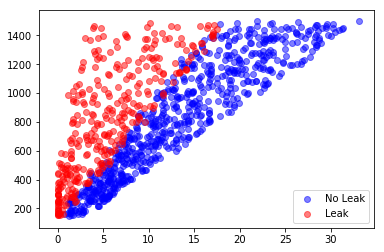

In [36]:
plt.scatter(upred,rv,c='b',alpha=0.5)
plt.scatter(uxpred,xrv,c='r',alpha=0.5)
plt.legend(('No Leak','Leak'),loc='lower right')

In [37]:
udata['class']=0

In [38]:
udata.head()

,Pulse_Rate,Quantity,class
0,1470,28.362,0
1,1252,15.450,0
2,1194,16.597,0
3,968,15.508,0
4,299,4.017,0


In [39]:
xdata['class']=1

In [40]:
xdata.head()

,Pulse_Rate,Quantity,class
0,676,1.358,1
1,1138,13.006,1
2,239,0.000,1
3,308,1.928,1
4,1167,14.079,1


In [41]:
actdata=pd.concat([udata,xdata])

In [42]:
len(actdata)

1000

In [43]:
actdata.head()

,Pulse_Rate,Quantity,class
0,1470,28.362,0
1,1252,15.450,0
2,1194,16.597,0
3,968,15.508,0
4,299,4.017,0


In [44]:
actdata.tail()

,Pulse_Rate,Quantity,class
322,1169,14.084,1
323,253,1.977,1
324,280,1.530,1
325,1209,12.926,1
326,678,3.864,1


In [45]:
actdata=sklearn.utils.shuffle(actdata)

In [46]:
actdata.head()

,Pulse_Rate,Quantity,class
3,968,15.508,0
621,668,10.304,0
54,1182,4.126,1
489,483,9.161,0
349,387,5.621,0


In [47]:
actdata.tail()

,Pulse_Rate,Quantity,class
204,1287,23.698,0
225,673,11.312,0
613,973,14.151,0
227,962,1.721,1
314,749,14.367,0


In [48]:
actdata.to_csv("random datset.csv")